## What is H2O:-
H2O is a fully open source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms including gradient boosted machines, generalized linear models, deep learning and more. H2O also has an industry leading AutoML functionality that automatically runs through all the algorithms and their hyperparameters to produce a leaderboard of the best models. The H2O platform is used by over 18,000 organizations globally and is extremely popular in both the R & Python communities

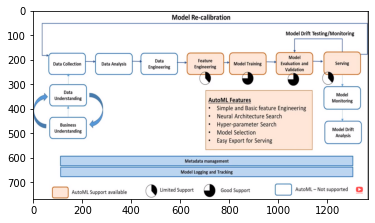

In [13]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('2020-05-31 (7).png') 
  
# Output Images 
plt.imshow(img) 

### Install Library

In [3]:
!pip install h2o

     |████████████████████████████████| 128.3MB 110kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.3-py2.py3-none-any.whl size=128358449 sha256=700e1db0ff08bf37354cd09d680403bab2f70d2197f4159e9c60548992c066e0
  Stored in directory: /root/.cache/pip/wheels/8e/66/2c/0c2137d104352c2e6fb1991d496e5857ee17d39884b5b25b96
Successfully built h2o


### Import Libraries & Initialize the library

In [0]:
 import h2o

In [16]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,7 mins 30 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_ym2ogm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.179 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [0]:
from h2o.automl import H2OAutoML

In [28]:
data = h2o.import_file('column_2C_weka.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


### Load data

In [29]:
data.head()    #Check head

pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
63.0278,22.5526,39.6091,40.4752,98.6729,-0.2544,Abnormal
39.057,10.061,25.0154,28.996,114.405,4.56426,Abnormal
68.832,22.2185,50.0922,46.6135,105.985,-3.53032,Abnormal
69.297,24.6529,44.3112,44.6441,101.868,11.2115,Abnormal
49.7129,9.65207,28.3174,40.0608,108.169,7.9185,Abnormal
40.2502,13.9219,25.1249,26.3283,130.328,2.23065,Abnormal
53.4329,15.8643,37.1659,37.5686,120.568,5.98855,Abnormal
45.3668,10.7556,29.0383,34.6111,117.27,-10.6759,Abnormal
43.7902,13.5338,42.6908,30.2564,125.003,13.289,Abnormal
36.6864,5.01088,41.9488,31.6755,84.2414,0.664437,Abnormal


In [30]:
data.types

{'class': 'enum',
 'degree_spondylolisthesis': 'real',
 'lumbar_lordosis_angle': 'real',
 'pelvic_incidence': 'real',
 'pelvic_radius': 'real',
 'pelvic_tilt numeric': 'real',
 'sacral_slope': 'real'}

In [31]:
data.describe()         #Data descriptive analysis with 10 records

Rows:310
Cols:7




,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
type,real,real,real,real,real,real,enum
mins,26.14792141,-6.554948347,14.0,13.3669307,70.08257486,-11.05817866,
mean,60.496652929516145,17.54282196797096,51.93092960345161,42.95383096141935,117.92065502380645,26.296694437867743,
maxs,129.8340406,49.4318636,125.7423855,121.4295656,163.0710405,418.5430821,
sigma,17.236520321708866,10.008330258206355,18.55406396276117,13.423102164839573,13.31737704490458,37.55902655487235,
zeros,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0
0,63.0278175,22.55258597,39.60911701,40.47523153,98.67291675,-0.254399986,Abnormal
1,39.05695098,10.06099147,25.01537822,28.99595951,114.4054254,4.564258645,Abnormal
2,68.83202098,22.21848205,50.09219357,46.61353893,105.9851355,-3.530317314,Abnormal


## Train,Test and Validation Split:-
Train:- 70% 

Test:- 15%

Validation :- 15%

In [0]:
data_train,data_test,data_valid = data.split_frame(ratios=[.7, .15])

In [33]:
data_train    #check train data

pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
39.057,10.061,25.0154,28.996,114.405,4.56426,Abnormal
68.832,22.2185,50.0922,46.6135,105.985,-3.53032,Abnormal
69.297,24.6529,44.3112,44.6441,101.868,11.2115,Abnormal
40.2502,13.9219,25.1249,26.3283,130.328,2.23065,Abnormal
45.3668,10.7556,29.0383,34.6111,117.27,-10.6759,Abnormal
43.7902,13.5338,42.6908,30.2564,125.003,13.289,Abnormal
36.6864,5.01088,41.9488,31.6755,84.2414,0.664437,Abnormal
31.2324,17.7158,15.5,13.5166,120.055,0.499751,Abnormal
48.9156,19.9646,40.2638,28.951,119.321,8.02889,Abnormal
57.3002,24.1889,47,33.1113,116.807,5.76695,Abnormal


In [34]:
data_test   #check test data

pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
63.0278,22.5526,39.6091,40.4752,98.6729,-0.2544,Abnormal
49.7129,9.65207,28.3174,40.0608,108.169,7.9185,Abnormal
54.1249,26.6505,35.3297,27.4744,121.447,1.5712,Abnormal
44.551,21.9311,26.7859,22.6199,111.073,2.65232,Abnormal
66.8792,24.892,49.2786,41.9872,113.477,-2.00589,Abnormal
50.8193,15.4022,42.5289,35.4171,112.193,10.8696,Abnormal
35.7035,19.4433,20.7,16.2602,137.541,-0.26349,Abnormal
74.4336,41.5573,27.7,32.8763,107.949,5.00009,Abnormal
78.4917,22.1818,60,56.3099,118.53,27.3832,Abnormal
70.2215,39.8227,68.1184,30.3987,148.526,145.378,Abnormal


In [35]:
data_valid    #check validation data

pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
53.4329,15.8643,37.1659,37.5686,120.568,5.98855,Abnormal
49.7066,13.041,31.3345,36.6656,108.648,-7.82599,Abnormal
53.5722,20.4608,33.1,33.1113,110.967,7.0448,Abnormal
44.3189,12.538,36.0988,31.7809,124.116,5.41583,Abnormal
43.9228,14.178,37.8325,29.7449,134.461,6.45165,Abnormal
63.0736,24.4138,54,38.6598,106.424,15.7797,Abnormal
43.581,16.5089,47,27.0721,109.272,8.99282,Abnormal
44.5291,9.43323,52,35.0958,134.712,29.1066,Abnormal
55.5122,20.0952,44,35.4171,122.649,34.5529,Abnormal
85.3523,15.8449,71.6687,69.5074,124.42,76.0206,Abnormal


## Predictors and outcome split

In [0]:
y = "class"
x = data.columns
x.remove(y)


## Create model object:-

maximum model= 10

nfold=0 means no cross validation (default=5)

exclude_algorithms = stacking and dL both allowed

for entire seen output use verbosity ='debug'

In [0]:

aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [39]:
!nvidia-smi                  #Check GPU

Sun May 31 09:43:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

### Train the model

In [40]:
aml.train(x = x, y = y, training_frame = data_train, validation_frame=data_valid)

AutoML progress: |
09:44:12.188: Project: AutoML_20200531_94412183
09:44:12.189: Cross-validation disabled by user: no fold column nor nfolds > 1.
09:44:12.189: Setting stopping tolerance adaptively based on the training frame: 0.05
09:44:12.189: Build control seed: 10
09:44:12.190: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
09:44:12.213: training frame: Frame key: automl_training_py_4_sid_9784    cols: 7    rows: 195  chunks: 1    size: 10435  checksum: -3055112389804835289
09:44:12.213: validation frame: Frame key: py_6_sid_9784    cols: 7    rows: 45  chunks: 1    size: 3216  checksum: -4545433711638951093
09:44:12.226: leaderboard frame: Frame key: automl_leaderboard_py_4_sid_9784    cols: 7    rows: 25  chunks: 1    size: 2254  checksum: -2446711842023804772
09:44:12.226: blending frame: NULL
09:44:12.226: response column: class
09:44:12.226: fold column: n

In [41]:
!nvidia-smi

Sun May 31 09:47:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    58W / 149W |     74MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
leaderboard = aml.leaderboard

In [44]:
leaderboard.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_20200531_094412,0.991228,0.209017,0.974308,0.0263158,0.244842,0.0599477
DRF_1_AutoML_20200531_094412,0.973684,0.231316,0.941108,0.0833333,0.272064,0.074019
GBM_4_AutoML_20200531_094412,0.964912,0.247973,0.910722,0.109649,0.28337,0.0802984
GBM_1_AutoML_20200531_094412,0.964912,0.216945,0.910722,0.109649,0.266099,0.0708085
GLM_1_AutoML_20200531_094412,0.964912,0.236323,0.910722,0.109649,0.27638,0.076386
GBM_3_AutoML_20200531_094412,0.964912,0.228194,0.910722,0.109649,0.266441,0.070991
XRT_1_AutoML_20200531_094412,0.964912,0.255497,0.846964,0.0263158,0.281779,0.0793997
XGBoost_1_AutoML_20200531_094412,0.95614,0.263331,0.791206,0.0263158,0.289684,0.0839168
XGBoost_3_AutoML_20200531_094412,0.947368,0.311891,0.772387,0.0526316,0.300514,0.0903088
XGBoost_2_AutoML_20200531_094412,0.942982,0.338421,0.824668,0.109649,0.318359,0.101352


#### From above leaderboard we found that GBM is working fine 

## Prediction on test data

In [47]:
data_pred=aml.leader.predict(data_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [48]:
data_pred.head()
## Probabilty of abnormal and normal for head(10) records

predict,Abnormal,Normal
Normal,0.652635,0.347365
Normal,0.646329,0.353671
Abnormal,0.863031,0.136969
Normal,0.799874,0.200126
Normal,0.755071,0.244929
Normal,0.495517,0.504483
Normal,0.453985,0.546015
Normal,0.737023,0.262977
Abnormal,0.975629,0.0243712
Abnormal,0.973528,0.026472


## Check performance metrics

In [49]:
aml.leader.model_performance(data_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.08941111629346538
RMSE: 0.29901691640016853
LogLoss: 0.3030068708932952
Mean Per-Class Error: 0.1333333333333333
AUC: 0.94
AUCPR: 0.9131486753709253
Gini: 0.8799999999999999

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3586723290271728: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,28.0,2.0,0.0667,(2.0/30.0)
1,Normal,3.0,12.0,0.2,(3.0/15.0)
2,Total,31.0,14.0,0.1111,(5.0/45.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.358672,0.827586,13.0
1,max f2,0.026607,0.862069,26.0
2,max f0point5,0.619993,0.909091,9.0
3,max accuracy,0.619993,0.888889,9.0
4,max precision,0.969835,1.000000,0.0
5,max recall,0.026607,1.000000,26.0
6,max specificity,0.969835,1.000000,0.0
7,max absolute_mcc,0.619993,0.755929,9.0
8,max min_per_class_accuracy,0.323823,0.866667,16.0
9,max mean_per_class_accuracy,0.358672,0.866667,13.0



Gains/Lift Table: Avg response rate: 33.33 %, avg score: 30.00 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.022222,0.968432,3.00,3.000000,1.00,0.969835,1.000000,0.969835,0.066667,0.066667,200.0,200.000000
1,,2,0.022222,0.967030,0.00,3.000000,0.00,0.000000,1.000000,0.969835,0.000000,0.066667,-100.0,200.000000
2,,3,0.044444,0.960897,3.00,3.000000,1.00,0.966647,1.000000,0.968241,0.066667,0.133333,200.0,200.000000
3,,4,0.044444,0.952990,0.00,3.000000,0.00,0.000000,1.000000,0.968241,0.000000,0.133333,-100.0,200.000000
4,,5,0.066667,0.948296,3.00,3.000000,1.00,0.948677,1.000000,0.961720,0.066667,0.200000,200.0,200.000000
5,,6,0.111111,0.908758,3.00,3.000000,1.00,0.938767,1.000000,0.952539,0.133333,0.333333,200.0,200.000000
6,,7,0.155556,0.836249,3.00,3.000000,1.00,0.863976,1.000000,0.927235,0.133333,0.466667,200.0,200.000000
7,,8,0.200000,0.655778,3.00,3.000000,1.00,0.812266,1.000000,0.901686,0.133333,0.600000,200.0,200.000000
8,,9,0.311111,0.357672,1.80,2.571429,0.60,0.511549,0.857143,0.762352,0.200000,0.800000,80.0,157.142857
9,,10,0.400000,0.252148,0.75,2.166667,0.25,0.321959,0.722222,0.664487,0.066667,0.866667,-25.0,116.666667


In [0]:
## Try with all the model rather than leader model only i.e GBM

In [0]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [54]:
model_ids

['GBM_2_AutoML_20200531_094412',
 'DRF_1_AutoML_20200531_094412',
 'GBM_4_AutoML_20200531_094412',
 'GBM_1_AutoML_20200531_094412',
 'GLM_1_AutoML_20200531_094412',
 'GBM_3_AutoML_20200531_094412',
 'XRT_1_AutoML_20200531_094412',
 'XGBoost_1_AutoML_20200531_094412',
 'XGBoost_3_AutoML_20200531_094412',
 'XGBoost_2_AutoML_20200531_094412']

In [60]:
h2o.get_model([i for i in model_ids if "DRF" in i][0])

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_20200531_094412


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,45.0,45.0,17343.0,6.0,18.0,9.488889,17.0,37.0,25.911112




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.12937263547485556
RMSE: 0.35968407731626867
LogLoss: 0.5685727023940416
Mean Per-Class Error: 0.18427958015267176
AUC: 0.875
AUCPR: 0.7901712653547047
Gini: 0.75

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.375: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,104.0,27.0,0.2061,(27.0/131.0)
1,Normal,11.0,53.0,0.1719,(11.0/64.0)
2,Total,115.0,80.0,0.1949,(38.0/195.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.375000,0.736111,51.0
1,max f2,0.230769,0.828571,64.0
2,max f0point5,0.545455,0.733333,34.0
3,max accuracy,0.545455,0.820513,34.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000000,1.000000,102.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.416667,0.596743,45.0
8,max min_per_class_accuracy,0.387045,0.801527,50.0
9,max mean_per_class_accuracy,0.230769,0.815720,64.0



Gains/Lift Table: Avg response rate: 32.82 %, avg score: 32.61 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.035897,1.000000,3.046875,3.046875,1.000000,1.000000,1.000000,1.000000,0.109375,0.109375,204.687500,204.687500
1,,2,0.046154,0.944444,3.046875,3.046875,1.000000,0.944444,1.000000,0.987654,0.031250,0.140625,204.687500,204.687500
2,,3,0.051282,0.922917,3.046875,3.046875,1.000000,0.937500,1.000000,0.982639,0.015625,0.156250,204.687500,204.687500
3,,4,0.102564,0.829412,2.742188,2.894531,0.900000,0.874600,0.950000,0.928619,0.140625,0.296875,174.218750,189.453125
4,,5,0.158974,0.705882,1.938920,2.555444,0.636364,0.744980,0.838710,0.863457,0.109375,0.406250,93.892045,155.544355
5,,6,0.210256,0.642857,1.523438,2.303735,0.500000,0.660127,0.756098,0.813864,0.078125,0.484375,52.343750,130.373476
6,,7,0.302564,0.543030,2.200521,2.272246,0.722222,0.588636,0.745763,0.745150,0.203125,0.687500,120.052083,127.224576
7,,8,0.400000,0.379818,1.282895,2.031250,0.421053,0.451235,0.666667,0.673556,0.125000,0.812500,28.289474,103.125000
8,,9,0.502564,0.210526,0.914062,1.803253,0.300000,0.282192,0.591837,0.593686,0.093750,0.906250,-8.593750,80.325255
9,,10,0.610256,0.117647,0.290179,1.536239,0.095238,0.151894,0.504202,0.515722,0.031250,0.937500,-70.982143,53.623950




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.10690189803272965
RMSE: 0.32695855705689925
LogLoss: 0.3246778493968463
Mean Per-Class Error: 0.1333333333333333
AUC: 0.9311111111111111
AUCPR: 0.8738056259041342
Gini: 0.8622222222222222

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3111111111111111: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,24.0,6.0,0.2,(6.0/30.0)
1,Normal,1.0,14.0,0.0667,(1.0/15.0)
2,Total,25.0,20.0,0.1556,(7.0/45.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.311111,0.800000,17.0
1,max f2,0.244444,0.903614,20.0
2,max f0point5,0.755556,0.818182,7.0
3,max accuracy,0.755556,0.844444,7.0
4,max precision,0.955556,1.000000,0.0
5,max recall,0.244444,1.000000,20.0
6,max specificity,0.955556,1.000000,0.0
7,max absolute_mcc,0.311111,0.695701,17.0
8,max min_per_class_accuracy,0.334035,0.833333,15.0
9,max mean_per_class_accuracy,0.311111,0.866667,17.0



Gains/Lift Table: Avg response rate: 33.33 %, avg score: 34.06 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.022222,0.945778,3.0,3.000000,1.000000,0.955556,1.000000,0.955556,0.066667,0.066667,200.0,200.000000
1,,2,0.022222,0.936000,0.0,3.000000,0.000000,0.000000,1.000000,0.955556,0.000000,0.066667,-100.0,200.000000
2,,3,0.044444,0.926222,3.0,3.000000,1.000000,0.933333,1.000000,0.944444,0.066667,0.133333,200.0,200.000000
3,,4,0.044444,0.916444,0.0,3.000000,0.000000,0.000000,1.000000,0.944444,0.000000,0.133333,-100.0,200.000000
4,,5,0.066667,0.906667,3.0,3.000000,1.000000,0.911111,1.000000,0.933333,0.066667,0.200000,200.0,200.000000
5,,6,0.111111,0.857778,3.0,3.000000,1.000000,0.877778,1.000000,0.911111,0.133333,0.333333,200.0,200.000000
6,,7,0.155556,0.831111,3.0,3.000000,1.000000,0.844444,1.000000,0.892063,0.133333,0.466667,200.0,200.000000
7,,8,0.222222,0.755556,2.0,2.700000,0.666667,0.777778,0.900000,0.857778,0.133333,0.600000,100.0,170.000000
8,,9,0.311111,0.484444,1.5,2.357143,0.500000,0.605556,0.785714,0.785714,0.133333,0.733333,50.0,135.714286
9,,10,0.400000,0.320702,1.5,2.166667,0.500000,0.400175,0.722222,0.700039,0.133333,0.866667,50.0,116.666667




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-31 09:44:17,0.011 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-05-31 09:44:17,0.192 sec,5.0,0.443496,5.364606,0.786066,0.615159,2.094727,0.235955,0.377124,3.233114,0.870000,0.717883,2.25,0.177778
2,,2020-05-31 09:44:18,0.281 sec,10.0,0.387231,2.209997,0.840172,0.749423,2.752016,0.205128,0.352452,0.369454,0.916667,0.852284,3.00,0.133333
3,,2020-05-31 09:44:18,0.352 sec,15.0,0.389831,1.568779,0.839456,0.735572,2.742188,0.261538,0.356942,0.395371,0.898889,0.766426,3.00,0.133333
4,,2020-05-31 09:44:18,0.404 sec,20.0,0.380919,1.232445,0.849952,0.731100,2.666016,0.205128,0.342053,0.354979,0.914444,0.811339,3.00,0.177778
5,,2020-05-31 09:44:18,0.453 sec,25.0,0.371372,0.893337,0.862118,0.774020,3.046875,0.164103,0.333760,0.332999,0.927778,0.862325,3.00,0.155556
6,,2020-05-31 09:44:18,0.504 sec,30.0,0.362749,0.570210,0.872674,0.796081,3.046875,0.169231,0.328212,0.325171,0.926667,0.861646,3.00,0.155556
7,,2020-05-31 09:44:18,0.546 sec,35.0,0.359017,0.565275,0.874404,0.791100,3.046875,0.174359,0.323469,0.315443,0.934444,0.876142,3.00,0.133333
8,,2020-05-31 09:44:18,0.589 sec,40.0,0.357437,0.565753,0.874821,0.794349,3.046875,0.179487,0.327423,0.324041,0.932222,0.870157,3.00,0.133333
9,,2020-05-31 09:44:18,0.625 sec,45.0,0.359684,0.568573,0.875000,0.790171,3.046875,0.194872,0.326959,0.324678,0.931111,0.873806,3.00,0.155556



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,degree_spondylolisthesis,458.555634,1.000000,0.335771
1,pelvic_radius,217.830048,0.475035,0.159503
2,pelvic_incidence,188.530487,0.411140,0.138049
3,lumbar_lordosis_angle,181.631393,0.396095,0.132997
4,pelvic_tilt numeric,168.323227,0.367073,0.123252
5,sacral_slope,150.809097,0.328879,0.110428


In [61]:
h2o.get_model([i for i in model_ids if "XGBoost" in i][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20200531_094412


Model Summary: 


,,number_of_trees
0,,40.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0705970066572566
RMSE: 0.2657009722550081
LogLoss: 0.2321763836394465
Mean Per-Class Error: 0.09977337786259544
AUC: 0.9657681297709924
AUCPR: 0.9421515772258066
Gini: 0.9315362595419847

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4814401865005493: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,120.0,11.0,0.084,(11.0/131.0)
1,Normal,8.0,56.0,0.125,(8.0/64.0)
2,Total,128.0,67.0,0.0974,(19.0/195.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.481440,0.854962,66.0
1,max f2,0.316118,0.905045,80.0
2,max f0point5,0.762519,0.905172,41.0
3,max accuracy,0.602721,0.902564,52.0
4,max precision,0.986581,1.000000,0.0
5,max recall,0.067017,1.000000,113.0
6,max specificity,0.986581,1.000000,0.0
7,max absolute_mcc,0.481440,0.782126,66.0
8,max min_per_class_accuracy,0.437878,0.890625,69.0
9,max mean_per_class_accuracy,0.316118,0.900227,80.0



Gains/Lift Table: Avg response rate: 32.82 %, avg score: 33.76 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010256,0.983783,3.046875,3.046875,1.000000,0.985846,1.000000,0.985846,0.031250,0.031250,204.687500,204.687500
1,,2,0.020513,0.982267,3.046875,3.046875,1.000000,0.983214,1.000000,0.984530,0.031250,0.062500,204.687500,204.687500
2,,3,0.030769,0.977022,3.046875,3.046875,1.000000,0.980382,1.000000,0.983147,0.031250,0.093750,204.687500,204.687500
3,,4,0.041026,0.974962,3.046875,3.046875,1.000000,0.976484,1.000000,0.981481,0.031250,0.125000,204.687500,204.687500
4,,5,0.051282,0.969735,3.046875,3.046875,1.000000,0.972430,1.000000,0.979671,0.031250,0.156250,204.687500,204.687500
5,,6,0.102564,0.922830,3.046875,3.046875,1.000000,0.954527,1.000000,0.967099,0.156250,0.312500,204.687500,204.687500
6,,7,0.153846,0.863070,3.046875,3.046875,1.000000,0.894703,1.000000,0.942967,0.156250,0.468750,204.687500,204.687500
7,,8,0.200000,0.799649,3.046875,3.046875,1.000000,0.832612,1.000000,0.917501,0.140625,0.609375,204.687500,204.687500
8,,9,0.302564,0.528966,1.828125,2.633739,0.600000,0.669688,0.864407,0.833496,0.187500,0.796875,82.812500,163.373941
9,,10,0.400000,0.343011,1.282895,2.304688,0.421053,0.449083,0.756410,0.739857,0.125000,0.921875,28.289474,130.468750




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.09950560409572648
RMSE: 0.3154450888755862
LogLoss: 0.3014398874215483
Mean Per-Class Error: 0.08333333333333326
AUC: 0.9355555555555556
AUCPR: 0.8604079756838949
Gini: 0.8711111111111112

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25858595967292786: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,25.0,5.0,0.1667,(5.0/30.0)
1,Normal,0.0,15.0,0.0,(0.0/15.0)
2,Total,25.0,20.0,0.1111,(5.0/45.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.258586,0.857143,19.0
1,max f2,0.258586,0.937500,19.0
2,max f0point5,0.697008,0.820896,12.0
3,max accuracy,0.258586,0.888889,19.0
4,max precision,0.975901,1.000000,0.0
5,max recall,0.258586,1.000000,19.0
6,max specificity,0.975901,1.000000,0.0
7,max absolute_mcc,0.258586,0.790569,19.0
8,max min_per_class_accuracy,0.268289,0.833333,17.0
9,max mean_per_class_accuracy,0.258586,0.916667,19.0



Gains/Lift Table: Avg response rate: 33.33 %, avg score: 33.12 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.022222,0.968117,3.0,3.000000,1.0,0.975901,1.000000,0.975901,0.066667,0.066667,200.0,200.000000
1,,2,0.022222,0.960332,0.0,3.000000,0.0,0.000000,1.000000,0.975901,0.000000,0.066667,-100.0,200.000000
2,,3,0.044444,0.952059,3.0,3.000000,1.0,0.958209,1.000000,0.967055,0.066667,0.133333,200.0,200.000000
3,,4,0.044444,0.943601,0.0,3.000000,0.0,0.000000,1.000000,0.967055,0.000000,0.133333,-100.0,200.000000
4,,5,0.066667,0.935972,3.0,3.000000,1.0,0.938988,1.000000,0.957699,0.066667,0.200000,200.0,200.000000
5,,6,0.111111,0.905427,3.0,3.000000,1.0,0.917192,1.000000,0.941496,0.133333,0.333333,200.0,200.000000
6,,7,0.155556,0.825418,1.5,2.571429,0.5,0.895256,0.857143,0.928285,0.066667,0.400000,50.0,157.142857
7,,8,0.200000,0.742883,1.5,2.333333,0.5,0.767744,0.777778,0.892609,0.066667,0.466667,50.0,133.333333
8,,9,0.311111,0.573420,2.4,2.357143,0.8,0.694257,0.785714,0.821769,0.266667,0.733333,140.0,135.714286
9,,10,0.400000,0.265687,1.5,2.166667,0.5,0.415284,0.722222,0.731439,0.133333,0.866667,50.0,116.666667




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-31 09:44:12,0.066 sec,0.0,0.500000,0.693147,0.500000,0.328205,1.000000,0.671795,0.500000,0.693147,0.500000,0.333333,1.0,0.666667
1,,2020-05-31 09:44:13,0.552 sec,5.0,0.345181,0.399742,0.940542,0.900528,3.046875,0.128205,0.346208,0.398001,0.938889,0.874242,3.0,0.111111
2,,2020-05-31 09:44:13,0.684 sec,10.0,0.310167,0.328392,0.950799,0.922550,3.046875,0.102564,0.334025,0.361485,0.928889,0.851772,3.0,0.111111
3,,2020-05-31 09:44:13,0.772 sec,15.0,0.286596,0.278871,0.957598,0.930887,3.046875,0.102564,0.318146,0.321090,0.935556,0.855294,3.0,0.111111
4,,2020-05-31 09:44:13,0.916 sec,20.0,0.280204,0.262791,0.958671,0.930933,3.046875,0.107692,0.310032,0.298387,0.948889,0.895664,3.0,0.088889
5,,2020-05-31 09:44:13,1.061 sec,25.0,0.274855,0.249275,0.960818,0.934963,3.046875,0.107692,0.310449,0.292587,0.946667,0.885227,3.0,0.088889
6,,2020-05-31 09:44:13,1.217 sec,30.0,0.271854,0.243765,0.959924,0.933477,3.046875,0.107692,0.314151,0.296985,0.946667,0.880634,3.0,0.088889
7,,2020-05-31 09:44:13,1.275 sec,35.0,0.266205,0.237079,0.966126,0.942295,3.046875,0.087179,0.314544,0.303184,0.942222,0.869486,3.0,0.111111
8,,2020-05-31 09:44:13,1.344 sec,40.0,0.265701,0.232176,0.965768,0.942152,3.046875,0.097436,0.315445,0.301440,0.935556,0.860408,3.0,0.111111



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,degree_spondylolisthesis,100.883530,1.000000,0.377206
1,pelvic_radius,50.359764,0.499187,0.188297
2,sacral_slope,45.069721,0.446750,0.168517
3,pelvic_tiltnumeric,39.137630,0.387949,0.146337
4,lumbar_lordosis_angle,21.286068,0.210996,0.079589
5,pelvic_incidence,10.712509,0.106187,0.040054


## Check Parameters use for xgboost model

In [0]:
final = h2o.get_model([i for i in model_ids if "XGBoost" in i][0])

In [67]:
final.params

{'backend': {'actual': 'auto', 'default': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0},
 'distribution': {'actual': 'bernoulli', 'default': 'AUTO'},
 'dmatrix_type': {'actual': 'auto', 'default': 'auto'},
 'eta': {'actual': 0.3, 'default': 0.3},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'AUTO', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'gamma': {'actual': 0.0, 'default': 0.0},
 'gpu_id

## Check best parameters after converting H2O parameter into xgboost parameter

In [68]:
final.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 10,
  'min_child_weight': 5.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 10,
  'silent': True,
  'subsample': 0.6,
  'updater': 'grow_gpu_hist'},
 10000)

In [69]:
final

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20200531_094412


Model Summary: 


,,number_of_trees
0,,40.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0705970066572566
RMSE: 0.2657009722550081
LogLoss: 0.2321763836394465
Mean Per-Class Error: 0.09977337786259544
AUC: 0.9657681297709924
AUCPR: 0.9421515772258066
Gini: 0.9315362595419847

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4814401865005493: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,120.0,11.0,0.084,(11.0/131.0)
1,Normal,8.0,56.0,0.125,(8.0/64.0)
2,Total,128.0,67.0,0.0974,(19.0/195.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.481440,0.854962,66.0
1,max f2,0.316118,0.905045,80.0
2,max f0point5,0.762519,0.905172,41.0
3,max accuracy,0.602721,0.902564,52.0
4,max precision,0.986581,1.000000,0.0
5,max recall,0.067017,1.000000,113.0
6,max specificity,0.986581,1.000000,0.0
7,max absolute_mcc,0.481440,0.782126,66.0
8,max min_per_class_accuracy,0.437878,0.890625,69.0
9,max mean_per_class_accuracy,0.316118,0.900227,80.0



Gains/Lift Table: Avg response rate: 32.82 %, avg score: 33.76 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010256,0.983783,3.046875,3.046875,1.000000,0.985846,1.000000,0.985846,0.031250,0.031250,204.687500,204.687500
1,,2,0.020513,0.982267,3.046875,3.046875,1.000000,0.983214,1.000000,0.984530,0.031250,0.062500,204.687500,204.687500
2,,3,0.030769,0.977022,3.046875,3.046875,1.000000,0.980382,1.000000,0.983147,0.031250,0.093750,204.687500,204.687500
3,,4,0.041026,0.974962,3.046875,3.046875,1.000000,0.976484,1.000000,0.981481,0.031250,0.125000,204.687500,204.687500
4,,5,0.051282,0.969735,3.046875,3.046875,1.000000,0.972430,1.000000,0.979671,0.031250,0.156250,204.687500,204.687500
5,,6,0.102564,0.922830,3.046875,3.046875,1.000000,0.954527,1.000000,0.967099,0.156250,0.312500,204.687500,204.687500
6,,7,0.153846,0.863070,3.046875,3.046875,1.000000,0.894703,1.000000,0.942967,0.156250,0.468750,204.687500,204.687500
7,,8,0.200000,0.799649,3.046875,3.046875,1.000000,0.832612,1.000000,0.917501,0.140625,0.609375,204.687500,204.687500
8,,9,0.302564,0.528966,1.828125,2.633739,0.600000,0.669688,0.864407,0.833496,0.187500,0.796875,82.812500,163.373941
9,,10,0.400000,0.343011,1.282895,2.304688,0.421053,0.449083,0.756410,0.739857,0.125000,0.921875,28.289474,130.468750




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.09950560409572648
RMSE: 0.3154450888755862
LogLoss: 0.3014398874215483
Mean Per-Class Error: 0.08333333333333326
AUC: 0.9355555555555556
AUCPR: 0.8604079756838949
Gini: 0.8711111111111112

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25858595967292786: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,25.0,5.0,0.1667,(5.0/30.0)
1,Normal,0.0,15.0,0.0,(0.0/15.0)
2,Total,25.0,20.0,0.1111,(5.0/45.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.258586,0.857143,19.0
1,max f2,0.258586,0.937500,19.0
2,max f0point5,0.697008,0.820896,12.0
3,max accuracy,0.258586,0.888889,19.0
4,max precision,0.975901,1.000000,0.0
5,max recall,0.258586,1.000000,19.0
6,max specificity,0.975901,1.000000,0.0
7,max absolute_mcc,0.258586,0.790569,19.0
8,max min_per_class_accuracy,0.268289,0.833333,17.0
9,max mean_per_class_accuracy,0.258586,0.916667,19.0



Gains/Lift Table: Avg response rate: 33.33 %, avg score: 33.12 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.022222,0.968117,3.0,3.000000,1.0,0.975901,1.000000,0.975901,0.066667,0.066667,200.0,200.000000
1,,2,0.022222,0.960332,0.0,3.000000,0.0,0.000000,1.000000,0.975901,0.000000,0.066667,-100.0,200.000000
2,,3,0.044444,0.952059,3.0,3.000000,1.0,0.958209,1.000000,0.967055,0.066667,0.133333,200.0,200.000000
3,,4,0.044444,0.943601,0.0,3.000000,0.0,0.000000,1.000000,0.967055,0.000000,0.133333,-100.0,200.000000
4,,5,0.066667,0.935972,3.0,3.000000,1.0,0.938988,1.000000,0.957699,0.066667,0.200000,200.0,200.000000
5,,6,0.111111,0.905427,3.0,3.000000,1.0,0.917192,1.000000,0.941496,0.133333,0.333333,200.0,200.000000
6,,7,0.155556,0.825418,1.5,2.571429,0.5,0.895256,0.857143,0.928285,0.066667,0.400000,50.0,157.142857
7,,8,0.200000,0.742883,1.5,2.333333,0.5,0.767744,0.777778,0.892609,0.066667,0.466667,50.0,133.333333
8,,9,0.311111,0.573420,2.4,2.357143,0.8,0.694257,0.785714,0.821769,0.266667,0.733333,140.0,135.714286
9,,10,0.400000,0.265687,1.5,2.166667,0.5,0.415284,0.722222,0.731439,0.133333,0.866667,50.0,116.666667




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-31 09:44:12,0.066 sec,0.0,0.500000,0.693147,0.500000,0.328205,1.000000,0.671795,0.500000,0.693147,0.500000,0.333333,1.0,0.666667
1,,2020-05-31 09:44:13,0.552 sec,5.0,0.345181,0.399742,0.940542,0.900528,3.046875,0.128205,0.346208,0.398001,0.938889,0.874242,3.0,0.111111
2,,2020-05-31 09:44:13,0.684 sec,10.0,0.310167,0.328392,0.950799,0.922550,3.046875,0.102564,0.334025,0.361485,0.928889,0.851772,3.0,0.111111
3,,2020-05-31 09:44:13,0.772 sec,15.0,0.286596,0.278871,0.957598,0.930887,3.046875,0.102564,0.318146,0.321090,0.935556,0.855294,3.0,0.111111
4,,2020-05-31 09:44:13,0.916 sec,20.0,0.280204,0.262791,0.958671,0.930933,3.046875,0.107692,0.310032,0.298387,0.948889,0.895664,3.0,0.088889
5,,2020-05-31 09:44:13,1.061 sec,25.0,0.274855,0.249275,0.960818,0.934963,3.046875,0.107692,0.310449,0.292587,0.946667,0.885227,3.0,0.088889
6,,2020-05-31 09:44:13,1.217 sec,30.0,0.271854,0.243765,0.959924,0.933477,3.046875,0.107692,0.314151,0.296985,0.946667,0.880634,3.0,0.088889
7,,2020-05-31 09:44:13,1.275 sec,35.0,0.266205,0.237079,0.966126,0.942295,3.046875,0.087179,0.314544,0.303184,0.942222,0.869486,3.0,0.111111
8,,2020-05-31 09:44:13,1.344 sec,40.0,0.265701,0.232176,0.965768,0.942152,3.046875,0.097436,0.315445,0.301440,0.935556,0.860408,3.0,0.111111



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,degree_spondylolisthesis,100.883530,1.000000,0.377206
1,pelvic_radius,50.359764,0.499187,0.188297
2,sacral_slope,45.069721,0.446750,0.168517
3,pelvic_tiltnumeric,39.137630,0.387949,0.146337
4,lumbar_lordosis_angle,21.286068,0.210996,0.079589
5,pelvic_incidence,10.712509,0.106187,0.040054


In [0]:
final_gbm = h2o.get_model([piyush for piyush in model_ids if "GBM" in piyush][0])

### Confusion matrix

In [71]:
final.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4814401865005493: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,120.0,11.0,0.084,(11.0/131.0)
1,Normal,8.0,56.0,0.125,(8.0/64.0)
2,Total,128.0,67.0,0.0974,(19.0/195.0)


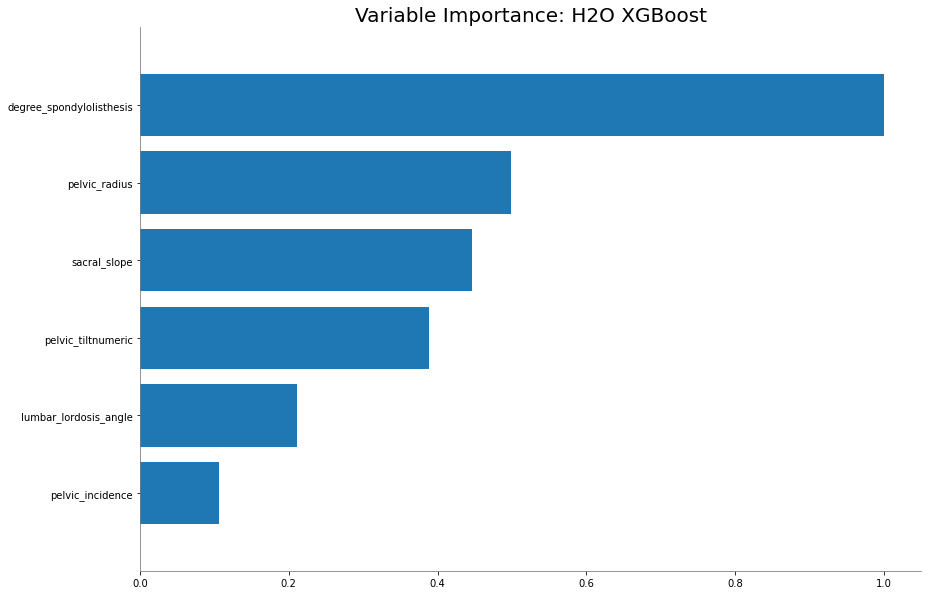

In [73]:
final.varimp_plot()    #Importance of feature plot

## Download the final model in mojo 

In [74]:
aml.leader.download_mojo(path = "./")

'/content/GBM_2_AutoML_20200531_094412.zip'